In [11]:
from library.Layers import D1FullLayer
from library.Activations import SigmoidActivation
from library.Losses import MeanSquaredError
from library.Network import Network
import numpy as np

import matplotlib.pyplot as plt

In [12]:
x = np.array([
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-3,-3,-3],
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-3,-3,-3],
    [1,2,3],
    [2,3,1],
    [-1,-2,-3],
    [-1,-3,-3]
])
y = np.array([
    [1],
    [1],
    [2],
    [2],
    [1],
    [1],
    [2],
    [2],
    [1],
    [1],
    [2],
    [2]
])

In [17]:
net = Network(3)
net.add(D1FullLayer, output_size=2, activation_type=SigmoidActivation)
net.add(D1FullLayer, output_size=1, activation_type=SigmoidActivation)

In [18]:
oldmse = MeanSquaredError.value(y, pred := net.predict_many(x))
newmse = oldmse - 1

print("MSE", oldmse)
print(pred, end="\n\n")

mse_history = [oldmse]

count = 0
while count < 100000 and (oldmse-newmse) > 0.000000000001:
    count += 1
    oldmse = MeanSquaredError.value(y, net.predict_many(x))
    net.fit(x, y, MeanSquaredError, lr=200)
    newmse = MeanSquaredError.value(y, pred := net.predict_many(x))
    mse_history.append(newmse)

print('MSE', newmse)
print(pred)

MSE 1.0512330051777081
[[0.73968257]
 [0.74019174]
 [0.57714492]
 [0.56865062]
 [0.73968257]
 [0.74019174]
 [0.57714492]
 [0.56865062]
 [0.73968257]
 [0.74019174]
 [0.57714492]
 [0.57243993]]

MSE 0.8792812743837414
[[0.56540519]
 [0.56540828]
 [0.74712677]
 [0.74712684]
 [0.56540519]
 [0.56540828]
 [0.74712677]
 [0.74712684]
 [0.56540519]
 [0.56540828]
 [0.74712677]
 [0.74712684]]


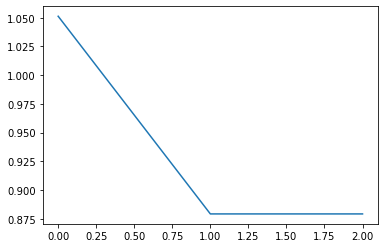

In [19]:
plt.plot(mse_history)